In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve

In [ ]:
adults = pd.read_csv('/content/adult_data.csv')

In [ ]:
adults.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
adults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   education       32560 non-null  object
 3   education_num   32560 non-null  int64 
 4   marital_status  32560 non-null  object
 5   occupation      32560 non-null  object
 6   relationship    32560 non-null  object
 7   race            32560 non-null  object
 8   sex             32560 non-null  object
 9   capital_gain    32560 non-null  int64 
 10  capital_loss    32560 non-null  int64 
 11  hours_per_week  32560 non-null  int64 
 12  native_country  32560 non-null  object
 13  income          32560 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [ ]:
categorical_variables = [col for col in adults.columns if adults.columns.dtype=='object']
categorical_variables

['age',
 'workclass',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income']

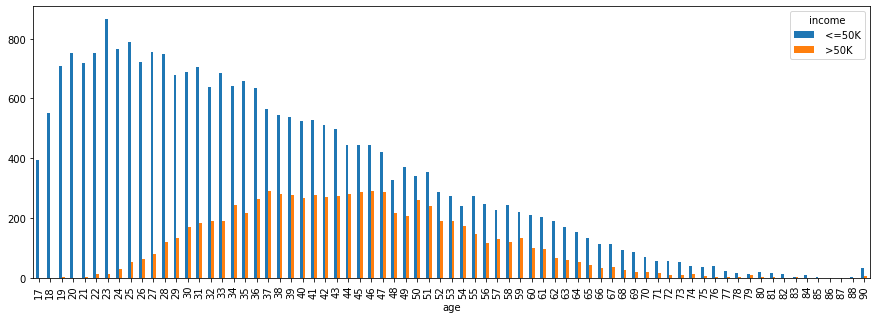

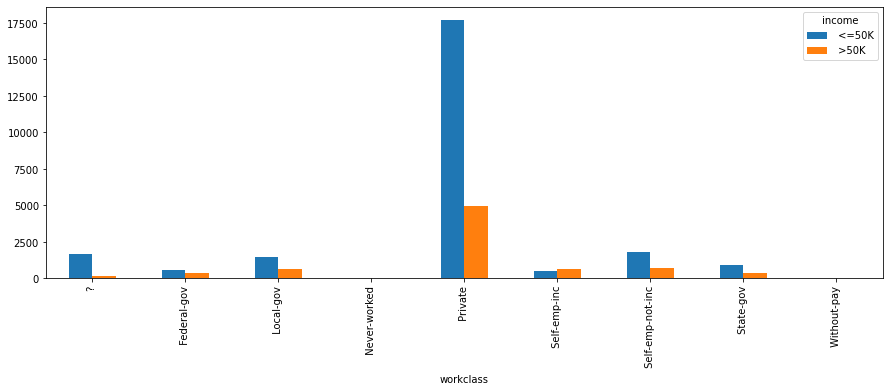

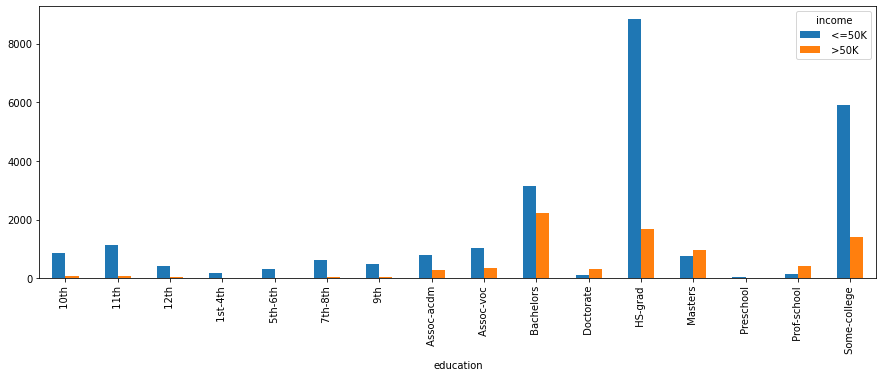

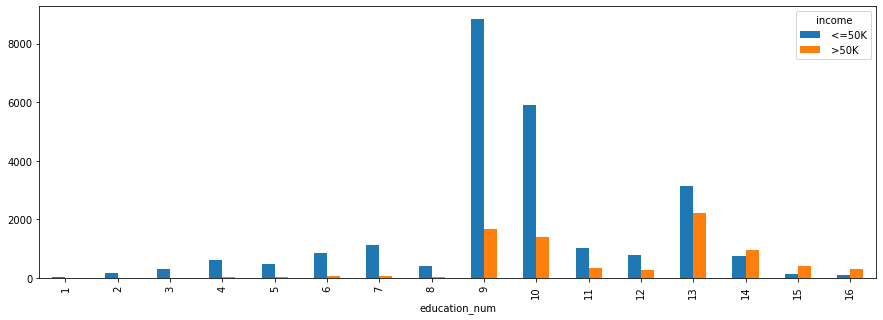

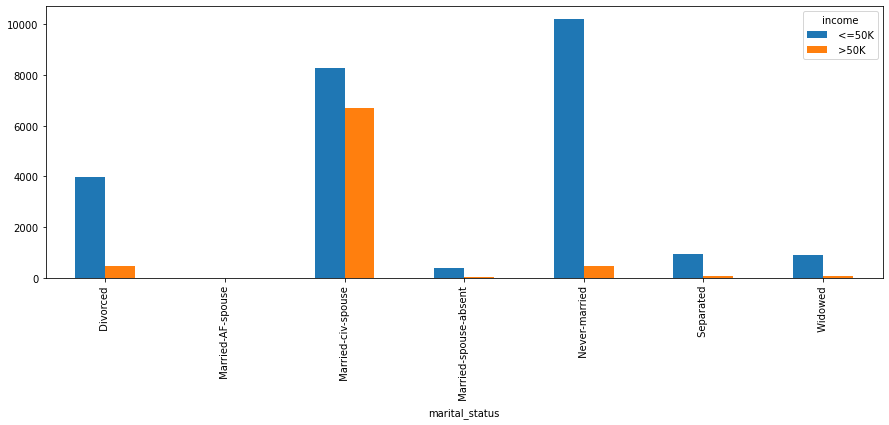

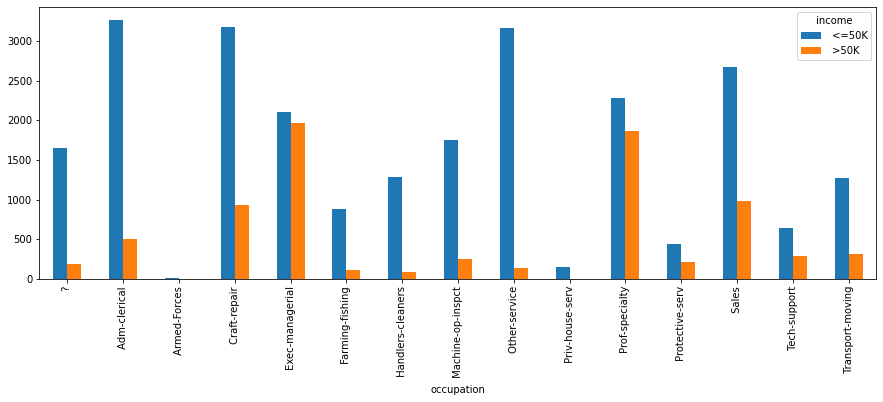

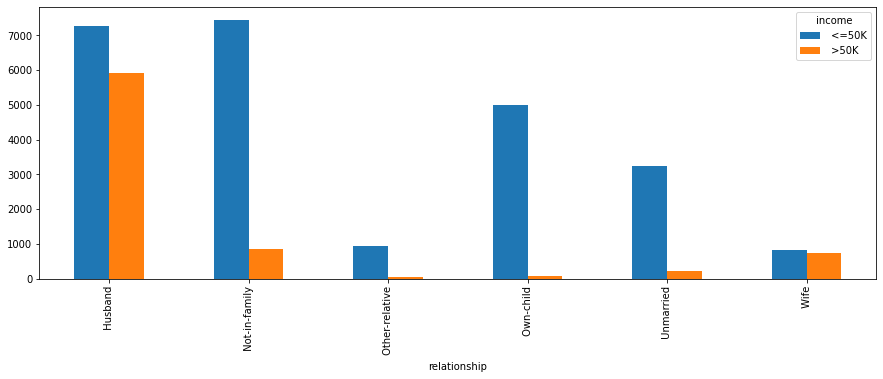

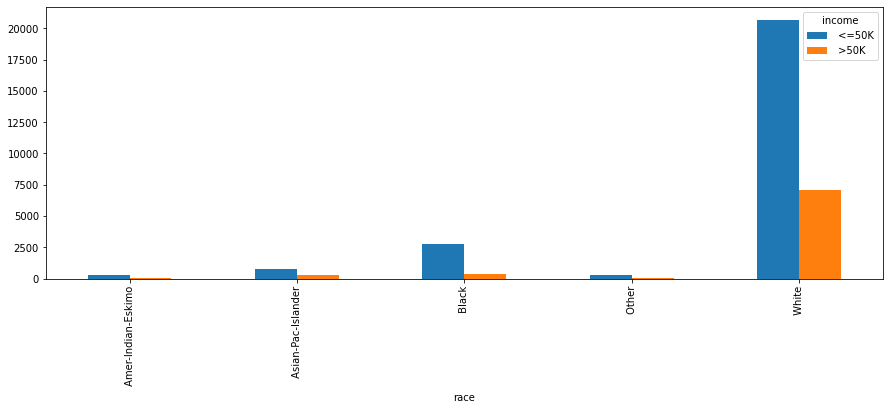

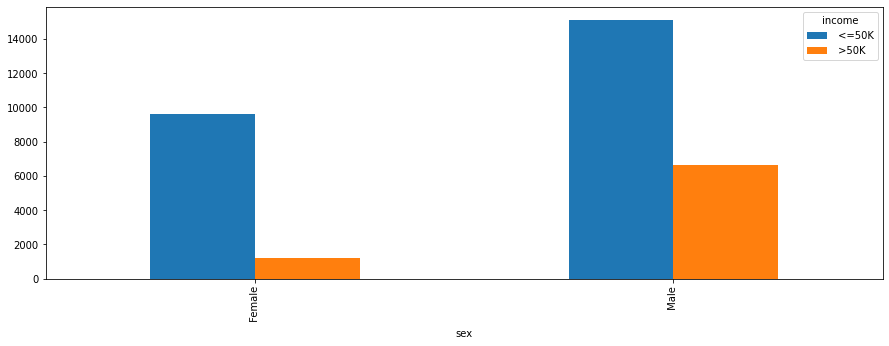

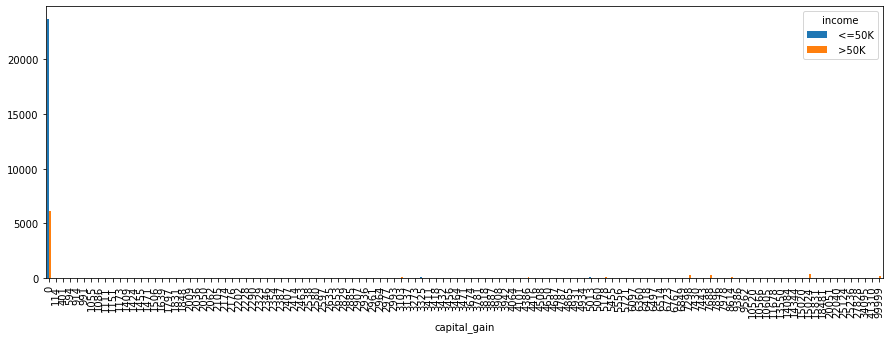

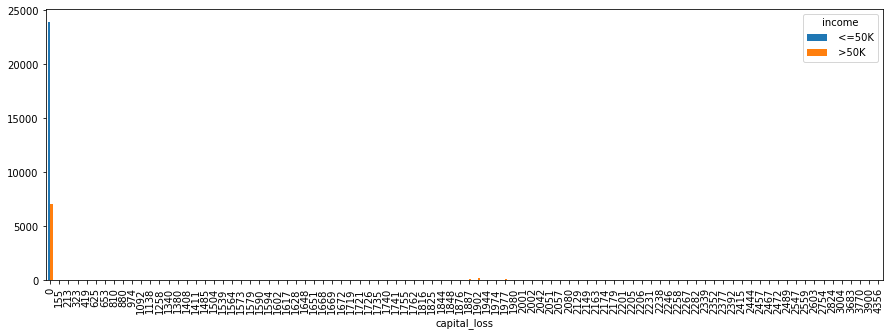

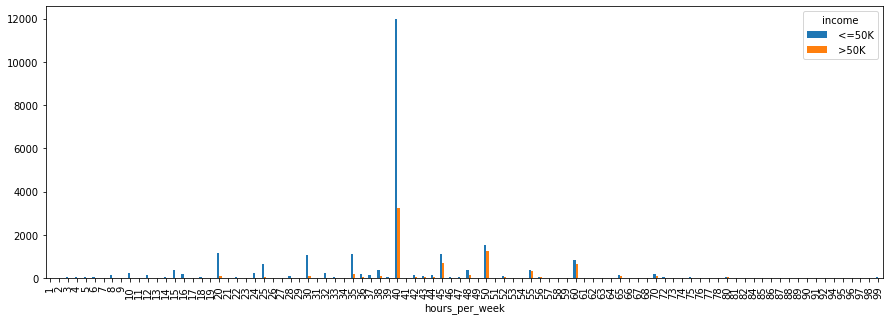

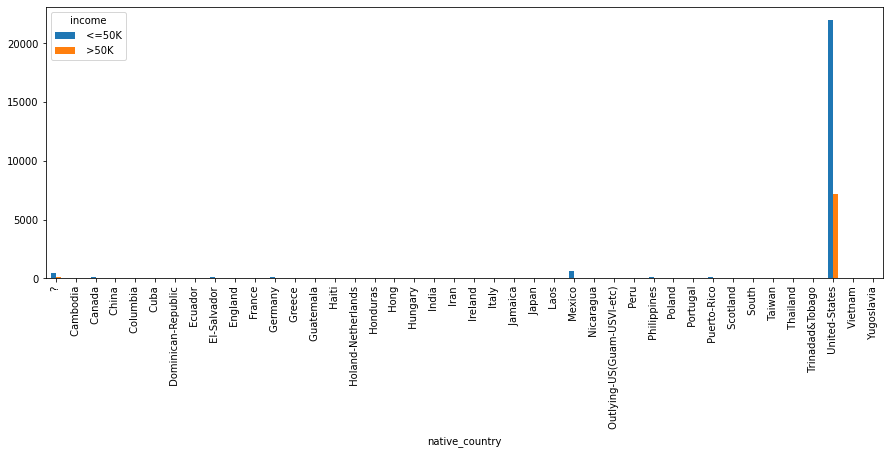

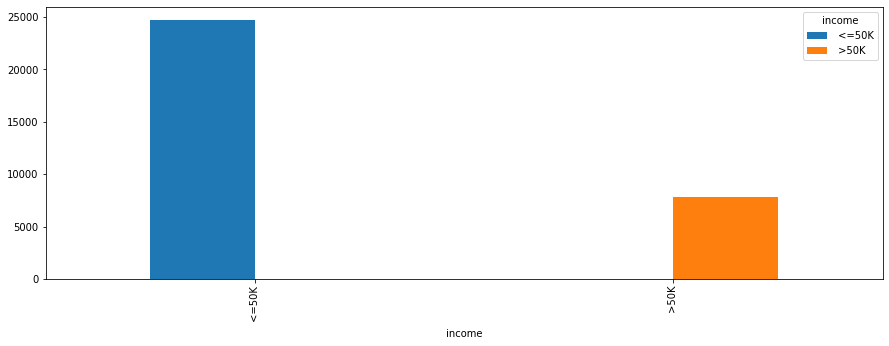

In [ ]:
# Cross tabulation between GENDER and APPROVE_LOAN
for col in adults.columns : 
    CrosstabResult=pd.crosstab(index=adults[col],columns=adults['income'])
    CrosstabResult.plot.bar(figsize=(15,5))

In [ ]:
adults.workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [ ]:
adults.workclass.replace(' ?', np.NaN, inplace=True)
adults.occupation.replace(' ?', np.NaN, inplace=True)
adults.native_country.replace(' ?', np.NaN, inplace=True)


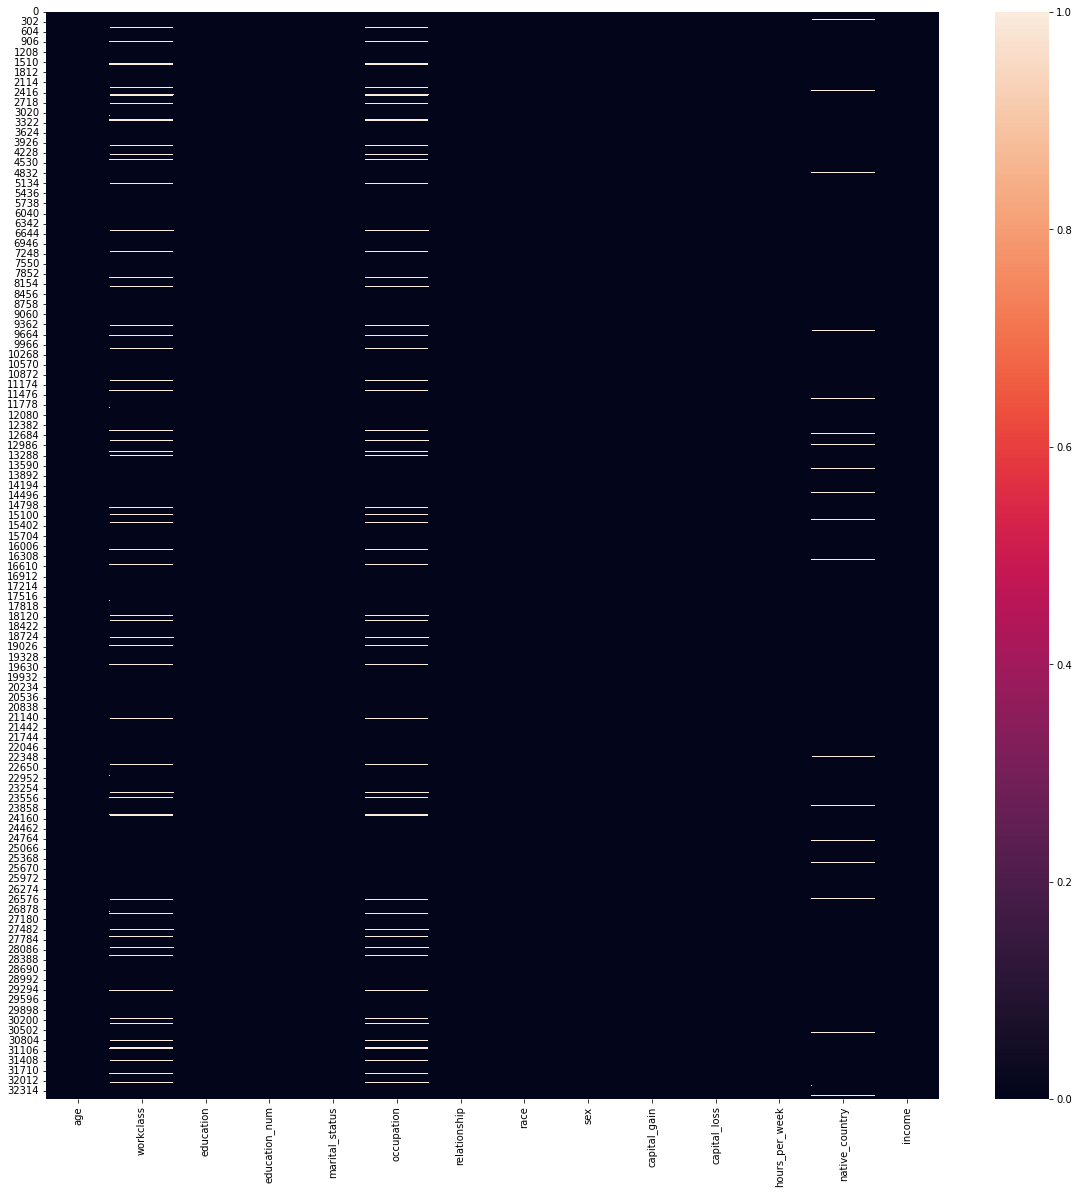

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(adults.isna())

In [ ]:
adults.dropna(axis=0, inplace=True)

In [ ]:
adults.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30161 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30161 non-null  int64 
 1   workclass       30161 non-null  object
 2   education       30161 non-null  object
 3   education_num   30161 non-null  int64 
 4   marital_status  30161 non-null  object
 5   occupation      30161 non-null  object
 6   relationship    30161 non-null  object
 7   race            30161 non-null  object
 8   sex             30161 non-null  object
 9   capital_gain    30161 non-null  int64 
 10  capital_loss    30161 non-null  int64 
 11  hours_per_week  30161 non-null  int64 
 12  native_country  30161 non-null  object
 13  income          30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


data spliting

In [ ]:
x= adults.drop(['income'], axis=1)
y= adults.income

In [ ]:
x_all=pd.get_dummies(x)
x_all

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,14,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,12,0,0,38,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32556,40,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,58,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,22,9,0,0,20,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


Model

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x_all, y, test_size=0.2, random_state=5)

In [ ]:
gnb =GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [ ]:
gnb.score(x_test, y_test)

0.8032487982761478

In [ ]:
y_pred=gnb.predict(x_test)

Cross Validation 

In [ ]:
gnb=GaussianNB()
cross_val_score(gnb,x_train, y_train, cv=5, scoring='accuracy')


array([0.80252797, 0.80853709, 0.80584335, 0.79274611, 0.80974093])

Accuracy

In [ ]:
gnb.fit(x_train, y_train)

GaussianNB()

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8032487982761478


Matrice de confusion

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm


array([[3651,  919],
       [ 268, 1195]])

Text(0.5, 1.0, 'matrice de confusion')

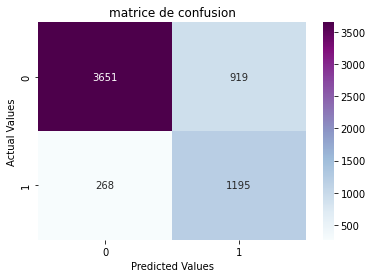

In [ ]:
sns.heatmap(cm, annot=True, fmt='g', cmap='BuPu')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("matrice de confusion")


Rapport de classification 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86      4570
        >50K       0.57      0.82      0.67      1463

    accuracy                           0.80      6033
   macro avg       0.75      0.81      0.76      6033
weighted avg       0.84      0.80      0.81      6033



ROC CURVE

In [ ]:
y_test.unique()

array([' <=50K', ' >50K'], dtype=object)

In [ ]:
y_test_roc=y_test.replace([' <=50K', ' >50K'],[0,1])
y_test_roc.unique()

array([0, 1])

In [ ]:
y_predicted=gnb.predict_proba(x_test)
y_predicted

array([[9.99999782e-01, 2.18197314e-07],
       [9.10559764e-01, 8.94402362e-02],
       [9.91301915e-01, 8.69808459e-03],
       ...,
       [2.16249846e-03, 9.97837502e-01],
       [9.99999536e-01, 4.63655800e-07],
       [1.33762591e-01, 8.66237409e-01]])

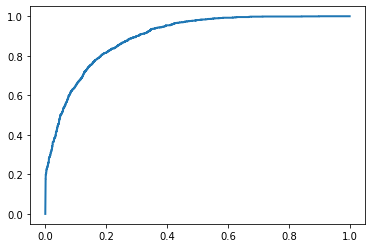

In [ ]:
fpr, tpr, thresh = roc_curve(y_test, y_predicted[:,1],pos_label = ' >50K',drop_intermediate=False) 
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)

In [ ]:
print(fpr.shape , tpr.shape , thresh.shape)

(5547,) (5547,) (5547,)


In [ ]:
score=y_predicted[:,1]
score_serie=pd.Series(score)
score_serie.unique().shape

(5546,)

ROC curve with binary target

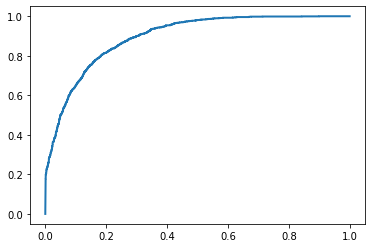

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_roc, y_predicted[:,1]) 
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)

2/BERNOULLINB

In [ ]:
bnb=BernoulliNB()

In [ ]:
bnb.fit(x_train, y_train)
y_pred=bnb.predict(x_test)
bnb.score(x_test,y_test)

0.7483838886126305

In [ ]:
false_values=(y_test != y_pred).sum()
false_values

1518

In [ ]:
true_values=(y_test == y_pred).sum()
true_values

4515

ROC curve

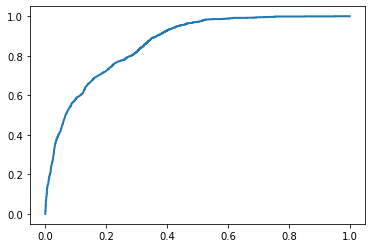

In [ ]:
y_predict=bnb.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predict[:,1],pos_label = ' >50K')  
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)

codage one hot

In [ ]:
age_dummies=pd.get_dummies(x.age)
edu_dummies=pd.get_dummies(x.education_num)
gain_dummies=pd.get_dummies(x.capital_gain)
loss_dummies=pd.get_dummies(x.capital_loss)
hours_per_week_dummies=pd.get_dummies(x.hours_per_week)

In [ ]:
cat_var=[col for col in x.columns if x[col].dtype=='object']
cat_var


['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [ ]:
cat_var_dummies=pd.get_dummies(x[cat_var])
cat_var_dummies

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32556,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
cat_var_dummies.shape

(30161, 98)

In [ ]:
x_bernoulli=pd.concat([cat_var_dummies,age_dummies,edu_dummies,gain_dummies,loss_dummies,hours_per_week_dummies],axis=1)
x_bernoulli

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,...,89,90,91,92,94,95,96,97,98,99
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32556,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32557,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32558,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


data spliting

In [ ]:
x_train_ber, x_test_ber, y_train_ber, y_test_ber = train_test_split(x_bernoulli, y, test_size = 0.2, random_state = 5)

In [ ]:
bnb = BernoulliNB()
bnb.fit(x_train_ber.to_numpy(), y_train_ber.to_numpy())
bnb.score(x_test_ber.to_numpy(),y_test_ber.to_numpy())

0.8047405934029505

In [ ]:
x_test_ber.shape

(6033, 488)

In [ ]:
x_test.shape

(6033, 103)

ROC curve

In [ ]:
y_pred_ber=bnb.predict_proba(x_test_ber.to_numpy())
y_pred_ber

array([[9.99972152e-01, 2.78484416e-05],
       [9.91967105e-01, 8.03289524e-03],
       [9.68191274e-01, 3.18087264e-02],
       ...,
       [1.57443423e-03, 9.98425566e-01],
       [9.99998459e-01, 1.54133882e-06],
       [1.43880722e-01, 8.56119278e-01]])

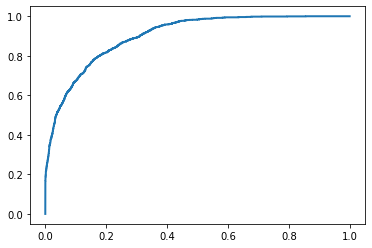

In [ ]:
fpr, tpr, thresh = roc_curve(y_test_ber, y_pred_ber[:,1],pos_label = ' >50K')  
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)